[**Demo %s**](#demo-gmres-intro)

We define a triangular matrix with known eigenvalues and a random vector $\mathbf{b}$.

In [2]:
lambda = 10 + (1:100);
A = diag(lambda) + triu(rand(100), 1); 
b = rand(100, 1);

Instead of building the Krylov matrices, we use the Arnoldi iteration to generate equivalent orthonormal vectors.

In [3]:
[Q, H] = arnoldi(A, b, 60);

The Arnoldi bases are used to solve the least-squares problems defining the GMRES iterates.

In [4]:
resid = norm(b);
for m = 1:60
    s = [norm(b); zeros(m, 1)];
    z = H(1:m+1, 1:m) \ s;
    x = Q(:, 1:m) * z;
    resid = [resid, norm(b - A * x)];
end

The approximations converge smoothly, practically all the way to machine epsilon.

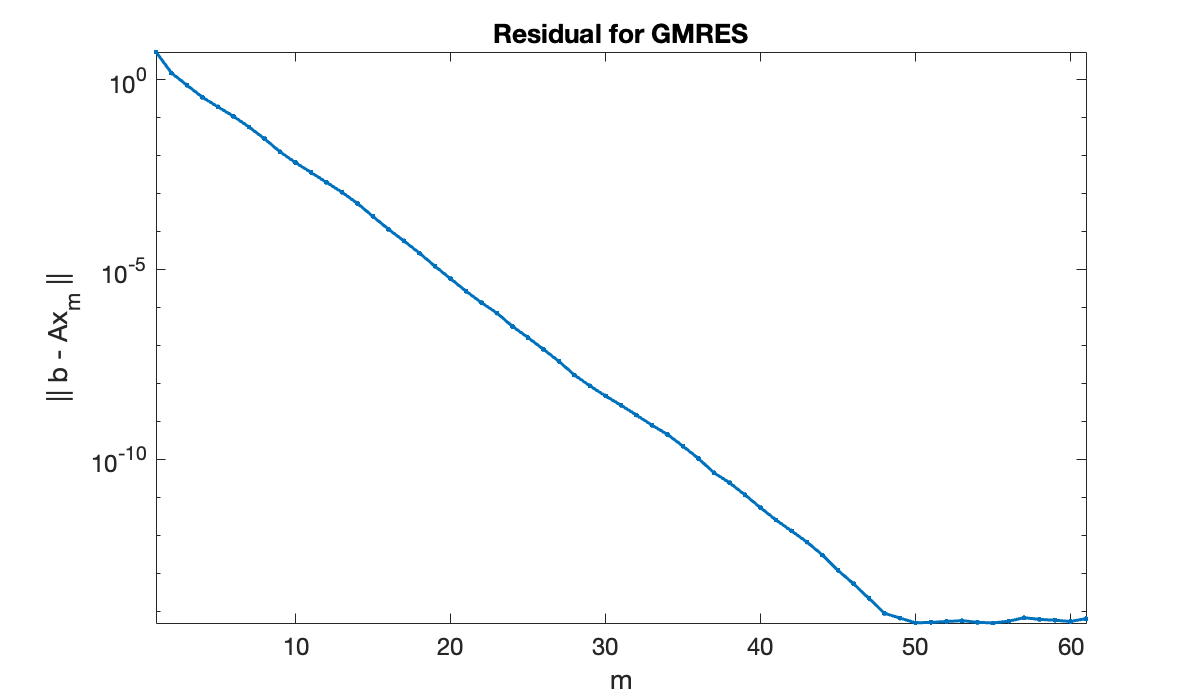

In [5]:
clf
semilogy(resid,'.-')
xlabel('m'),  ylabel('|| b - Ax_m ||')
axis tight, title(('Residual for GMRES'));